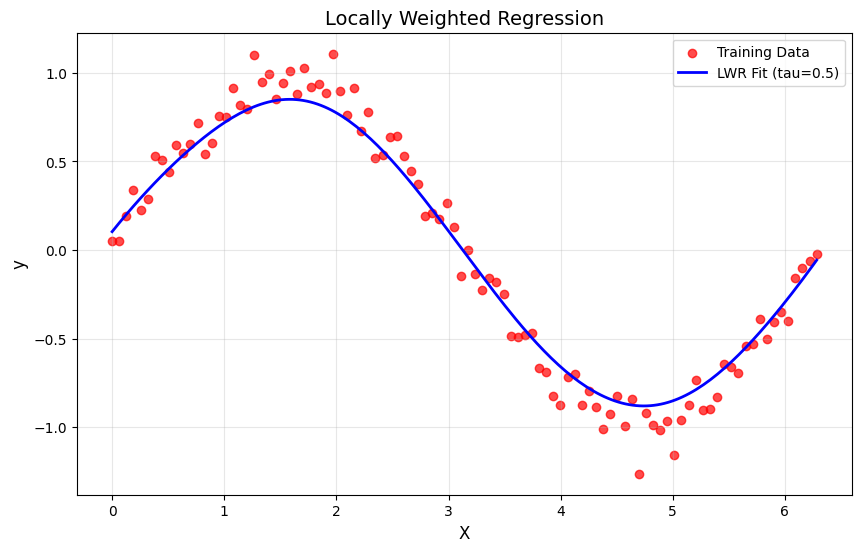

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta

np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]

x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()